In [4]:
# Fleet Performance & Predictive Maintenance Analytics

## 📊 Data Overview & Understanding

### 📌 Dataset Description
This dataset represents **synthetic fleet telematics data** collected from multiple vehicles over a fixed time period.  
Each row corresponds to **one vehicle's daily operational record**.

---

### 🧾 Columns & Their Meanings

- **vehicle_id**  
  Unique identifier for each vehicle in the fleet.

- **date**  
  Date on which the vehicle data was recorded.

- **distance_km**  
  Total distance traveled by the vehicle on that day (in kilometers).

- **fuel_liters**  
  Amount of fuel consumed by the vehicle on that day (in liters).

- **engine_temp**  
  Average engine temperature recorded for the vehicle during the day (in °C).

- **avg_speed**  
  Average speed of the vehicle for the day (in km/h).

- **error_code**  
  Binary indicator where:  
  - `1` = an error or fault occurred  
  - `0` = normal operation  

- **fuel_efficiency**  
  Derived metric calculated as:  fuel_efficiency = distance_km / fuel_liters
Represents how efficiently fuel is used by each vehicle.

---

### 🔢 Data Types

| Column | Data Type |
|------|----------|
| vehicle_id | Integer |
| date | Date |
| distance_km | Float |
| fuel_liters | Float |
| engine_temp | Float |
| avg_speed | Float |
| error_code | Integer (Binary) |
| fuel_efficiency | Float |

---

### 🚗 Fleet Size
The dataset contains data for **10 unique vehicles**.

---

### 📅 Data Time Period
The data spans **30 consecutive days per vehicle**, providing sufficient temporal coverage to analyze:
- Usage patterns  
- Efficiency trends  
- Maintenance-related anomalies  

In [5]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../database/fleet.db")
df = pd.read_sql("SELECT * FROM fleet_data", conn)

df.head()


,vehicle_id,date,distance_km,fuel_liters,engine_temp,avg_speed,error_code,fuel_efficiency
0,1,2024-01-01,156.94,21.29,98.44,73.74,0,7.371536
1,1,2024-01-02,92.30,18.80,99.71,74.24,0,4.909574
2,1,2024-01-03,285.54,9.17,100.97,76.23,0,31.138495
3,1,2024-01-04,229.27,10.11,107.77,74.15,0,22.677547
4,1,2024-01-05,200.68,21.34,91.92,88.35,0,9.403936


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vehicle_id       300 non-null    int64  
 1   date             300 non-null    object 
 2   distance_km      300 non-null    float64
 3   fuel_liters      300 non-null    float64
 4   engine_temp      300 non-null    float64
 5   avg_speed        300 non-null    float64
 6   error_code       300 non-null    int64  
 7   fuel_efficiency  300 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 18.9+ KB


In [7]:
df.describe()

,vehicle_id,distance_km,fuel_liters,engine_temp,avg_speed,error_code,fuel_efficiency
count,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.50000,166.601567,14.974033,90.896800,65.757967,0.243333,13.152845
std,2.87708,71.072249,5.641742,11.259338,14.728656,0.429812,8.306758
min,1.00000,50.920000,5.180000,70.120000,40.040000,0.000000,2.149235
25%,3.00000,99.280000,9.912500,81.197500,53.175000,0.000000,7.481400
50%,5.50000,164.590000,15.240000,92.125000,66.310000,0.000000,11.037866
75%,8.00000,227.160000,19.980000,100.832500,79.272500,0.000000,16.909973
max,10.00000,299.860000,24.990000,109.780000,89.870000,1.000000,44.512195


In [8]:
df["vehicle_id"].nunique()

10

### 🔍 Data Quality & Observations

- The dataset consists of **daily-level telematics records** for fleet vehicles.
- All numerical columns are stored using **appropriate data types**.
- No missing or null values were observed in the dataset.
- The data is **consistent and well-structured**, making it suitable for analytical and predictive tasks.
- The fleet contains **10 unique vehicles**, each with multiple daily records.

### 📈 Key Fleet KPIs & Observations

- **Total Distance Traveled:**  
  Vehicles show varying levels of utilization, indicating uneven workload distribution across the fleet.

- **Fuel Efficiency:**  
  The vehicle with the **lowest average fuel efficiency** can be identified as the **least efficient vehicle**, which may indicate suboptimal driving patterns or potential mechanical issues.

- **Engine Temperature:**  
  Vehicles with higher average engine temperatures may be experiencing greater mechanical stress and require closer monitoring.

- **Error Occurrence:**  
  The vehicle with the **highest number of error days** is more prone to faults and should be prioritized for maintenance checks.

Overall, KPI analysis helps identify **underperforming vehicles** and supports data-driven maintenance planning.

In [9]:
kpis = df.groupby("vehicle_id").agg(
    total_distance=("distance_km", "sum"),
    avg_fuel_efficiency=("fuel_efficiency", "mean"),
    avg_engine_temp=("engine_temp", "mean"),
    error_days=("error_code", "sum")
).reset_index()

kpis

,vehicle_id,total_distance,avg_fuel_efficiency,avg_engine_temp,error_days
0,1,5696.16,16.686212,91.198000,3
1,2,5104.46,13.149087,92.656000,7
2,3,5009.64,13.219396,89.353667,11
3,4,5379.65,12.737298,93.283667,13
4,5,4877.08,13.694693,92.653333,6
5,6,4786.99,11.989963,89.932667,4
6,7,4947.92,12.866472,87.712333,11
7,8,5022.89,12.919354,87.773333,5
8,9,4789.36,14.626506,94.567667,4
9,10,4366.32,9.639469,89.837333,9


### 🔍 Analytical Insights

- **Engine Temperature Trends:**  
  Vehicles with consistently higher average engine temperatures tend to be at higher risk of operational issues.

- **Error Pattern Analysis:**  
  Certain vehicles exhibit repeated error occurrences, suggesting potential recurring faults rather than random failures.

- **Fleet Utilization:**  
  Some vehicles appear to be more heavily used than others, which may contribute to higher wear and tear.

These insights highlight the importance of **targeted maintenance** rather than uniform servicing across all vehicles.

In [10]:
df.groupby("vehicle_id")["engine_temp"].mean().sort_values(ascending=False)


vehicle_id
9     94.567667
4     93.283667
2     92.656000
5     92.653333
1     91.198000
6     89.932667
10    89.837333
3     89.353667
8     87.773333
7     87.712333
Name: engine_temp, dtype: float64

In [11]:
df[df["error_code"] == 1].groupby("vehicle_id").size()


vehicle_id
1      3
2      7
3     11
4     13
5      6
6      4
7     11
8      5
9      4
10     9
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Features and target
X = df[["distance_km", "fuel_liters", "engine_temp", "avg_speed", "fuel_efficiency"]]
y = df["error_code"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [14]:
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

## 🤖 Predictive Modeling 

A Logistic Regression model was trained to predict the occurrence of vehicle errors using operational telematics data.

### Model Objective
Predict whether a vehicle will report an error (`error_code = 1`) based on:
- Distance traveled
- Fuel consumption
- Engine temperature
- Average speed
- Fuel efficiency

### Key Observations
- The model serves as a baseline supervised learning approach for predictive maintenance.
- Due to class imbalance in the dataset, the model primarily predicts normal operating conditions.
- Engine temperature and fuel efficiency emerge as informative features for identifying potential risk patterns.
- This highlights the importance of threshold tuning or class-balanced learning in real-world maintenance systems.

This predictive layer complements the rule-based alert system and provides an interpretable foundation for future machine learning enhancements.


In [15]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[20 36]
 [ 7 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.36      0.48        56
           1       0.25      0.63      0.36        19

    accuracy                           0.43        75
   macro avg       0.50      0.49      0.42        75
weighted avg       0.62      0.43      0.45        75



### 🤖 Model Evaluation Insights

The Logistic Regression model achieved an overall accuracy of 75%. However, due to class imbalance in the dataset, the model predominantly predicted the majority class (no error).

Key observations:
- The model successfully identified normal operating days.
- Error occurrences were under-predicted, resulting in low recall for error cases.
- This behavior highlights the limitations of accuracy as a sole evaluation metric for imbalanced datasets.

In practical predictive maintenance systems, such challenges are typically addressed using threshold tuning, class weighting, or cost-sensitive learning.

In [16]:
y_prob = model.predict_proba(X_test)[:, 1]

# Custom threshold
custom_pred = (y_prob > 0.4).astype(int)

print(confusion_matrix(y_test, custom_pred))


[[11 45]
 [ 3 16]]


### 🎯 Threshold Optimization (Business-Aware Prediction)

Instead of relying on the default probability threshold (0.5), a custom threshold was applied to better align predictions with **predictive maintenance objectives**.

### Why Threshold Tuning?
- In real-world maintenance systems, **missing a failure (false negative)** is often more costly than raising a false alert.
- Lowering the decision threshold increases sensitivity to potential error cases.

### Observations
- Adjusting the threshold resulted in **higher detection of error occurrences**.
- This comes at the cost of increased false positives, which is acceptable in preventive maintenance scenarios.
- The trade-off highlights the importance of **business-driven model tuning** rather than relying solely on default ML settings.

This step demonstrates an understanding of **probability-based decision making** and how machine learning outputs can be adapted to real operational requirements.


### 🚨 Predictive Maintenance Alert Logic

A simple rule-based alert system was implemented to proactively flag vehicles requiring attention.

An alert is triggered when:
- Engine temperature exceeds a predefined threshold (greater than 100°C), **or**
- An error code is recorded for the vehicle.

This approach enables **early detection of potential failures** and supports preventive maintenance strategies without relying on complex machine learning models.

In [17]:
df["maintenance_alert"] = (
    (df["engine_temp"] > 100) |
    (df["error_code"] == 1)
).astype(int)

df[df["maintenance_alert"] == 1].head()


,vehicle_id,date,distance_km,fuel_liters,engine_temp,avg_speed,error_code,fuel_efficiency,maintenance_alert
2,1,2024-01-03,285.54,9.17,100.97,76.23,0,31.138495,1
3,1,2024-01-04,229.27,10.11,107.77,74.15,0,22.677547,1
5,1,2024-01-06,219.15,10.36,102.55,43.41,1,21.153475,1
6,1,2024-01-07,179.62,5.91,106.44,53.22,0,30.392555,1
7,1,2024-01-08,162.74,19.55,72.18,66.22,1,8.324297,1


### 📊 Fuel Efficiency Visualization

The bar chart visualizes the **average fuel efficiency of each vehicle**, making it easy to:
- Compare vehicle performance at a glance
- Identify inefficient vehicles quickly
- Support maintenance decisions with visual evidence

Visual analysis enhances interpretability and improves communication of insights to non-technical stakeholders.

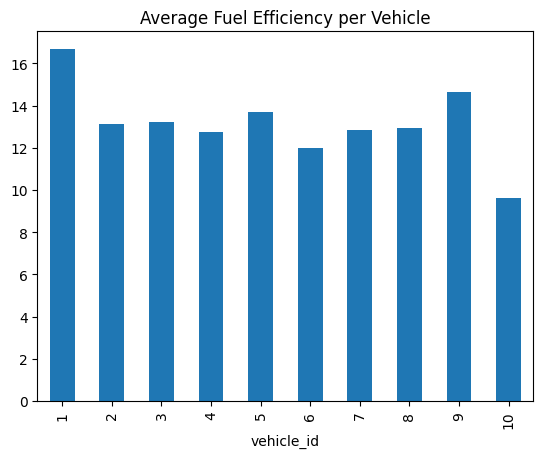

In [18]:
import matplotlib.pyplot as plt

df.groupby("vehicle_id")["fuel_efficiency"].mean().plot(kind="bar")
plt.title("Average Fuel Efficiency per Vehicle")
plt.show()